In [1]:
!pip install plotly --upgrade   #needed for the rectangle box feature

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (5.1.0)


In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv('DailyDelhiClimateTrain.csv')

In [4]:
dataset.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
dataset.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Text(0.5, 1.0, 'MeanPressure')

<Figure size 7200x5760 with 0 Axes>

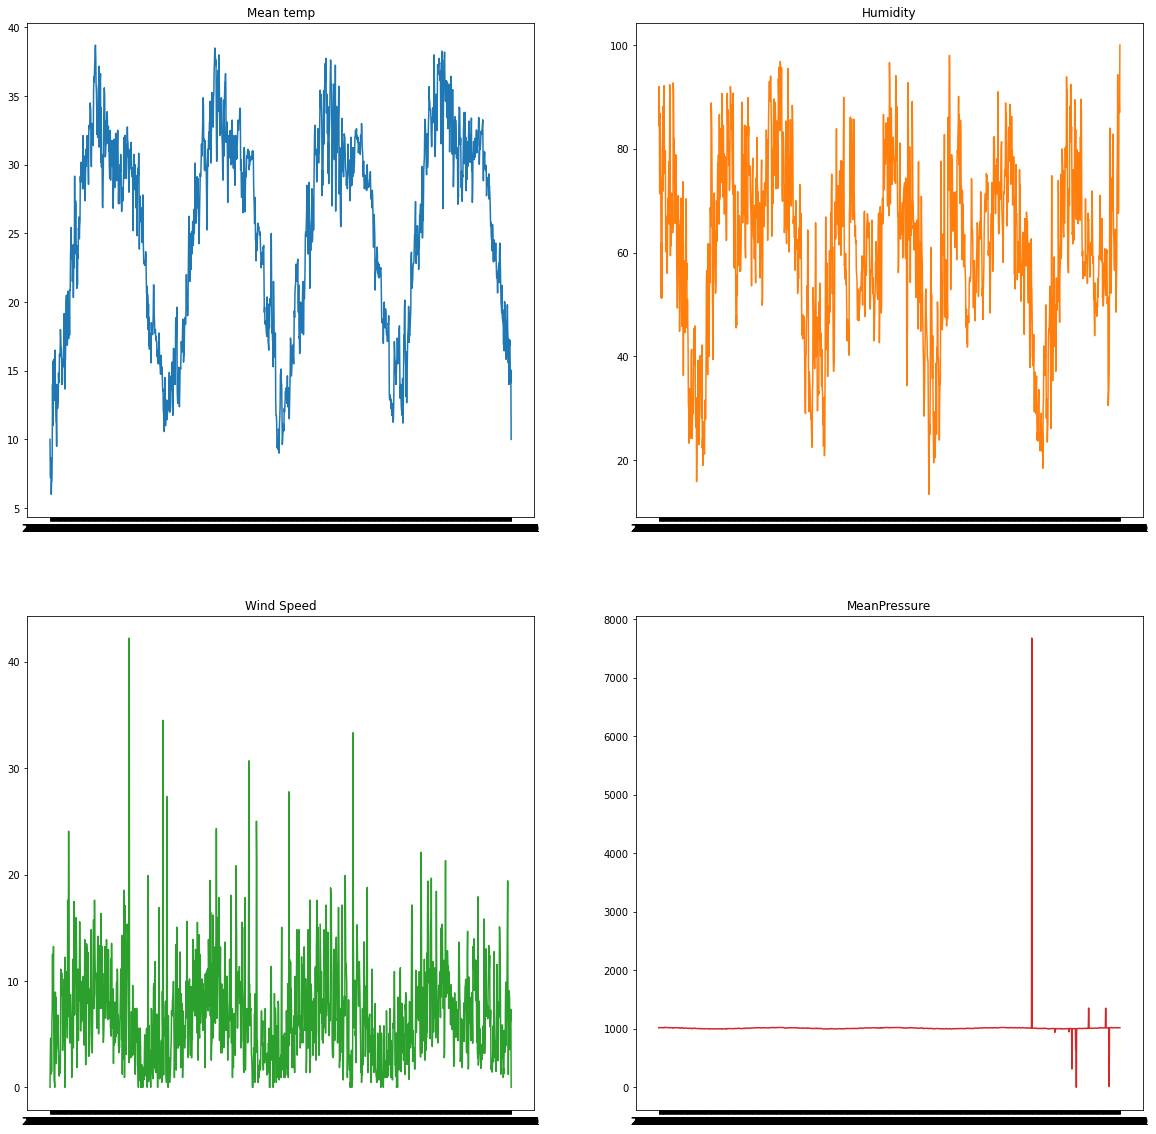

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0, 0].plot(dataset['date'],dataset['meantemp'])
axs[0, 0].set_title('Mean temp')
axs[0, 1].plot(dataset['date'],dataset['humidity'], 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[1, 0].plot(dataset['date'],dataset['wind_speed'], 'tab:green')
axs[1, 0].set_title('Wind Speed')
axs[1, 1].plot(dataset['date'],dataset['meanpressure'], 'tab:red')
axs[1, 1].set_title('MeanPressure')

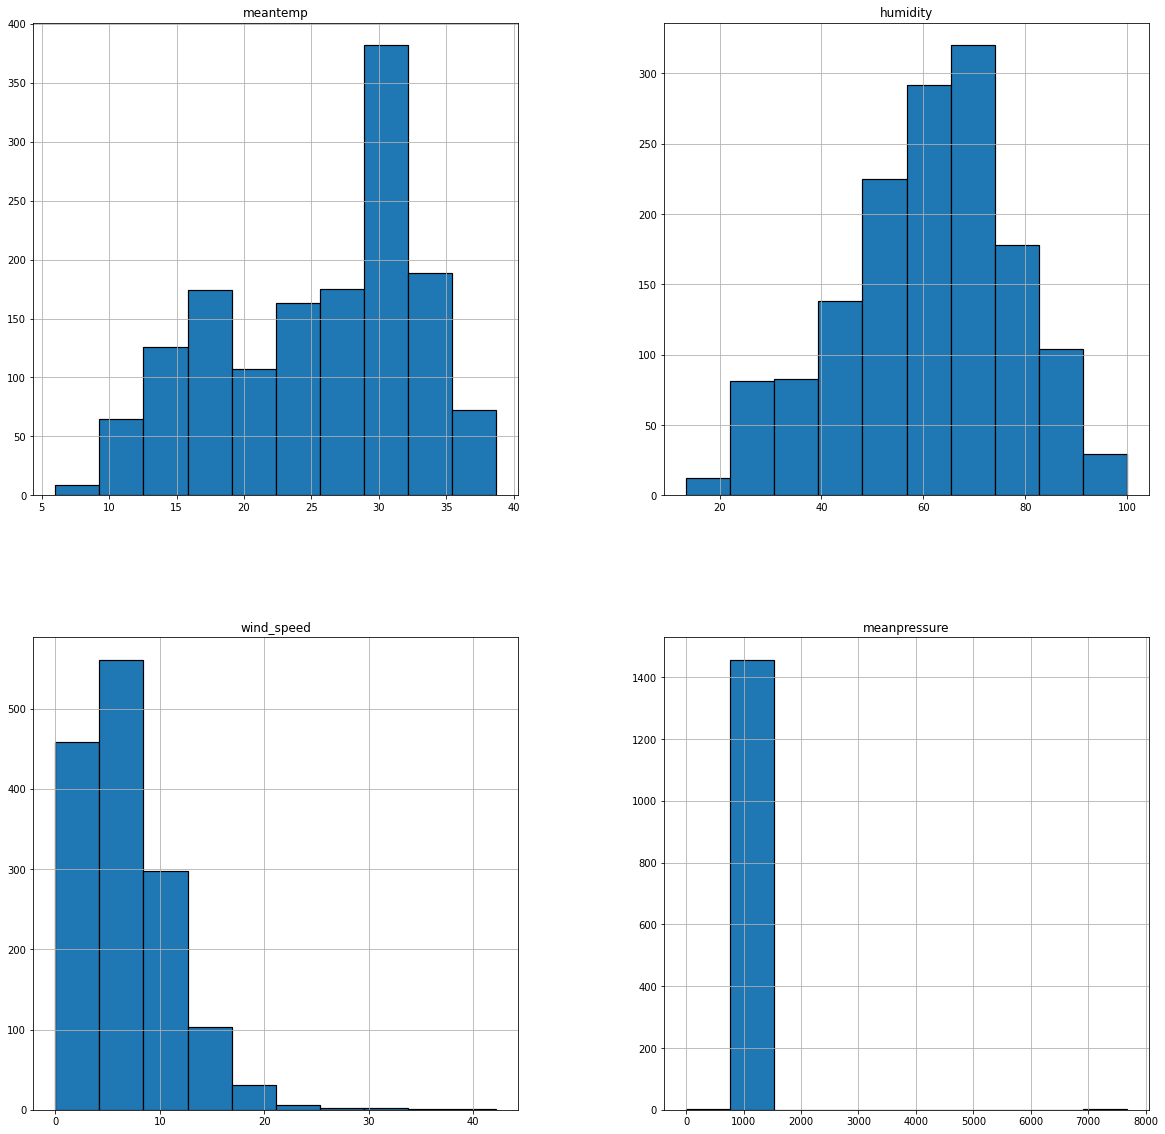

In [8]:
# Visualizing the distribution for every "feature"
dataset.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20));

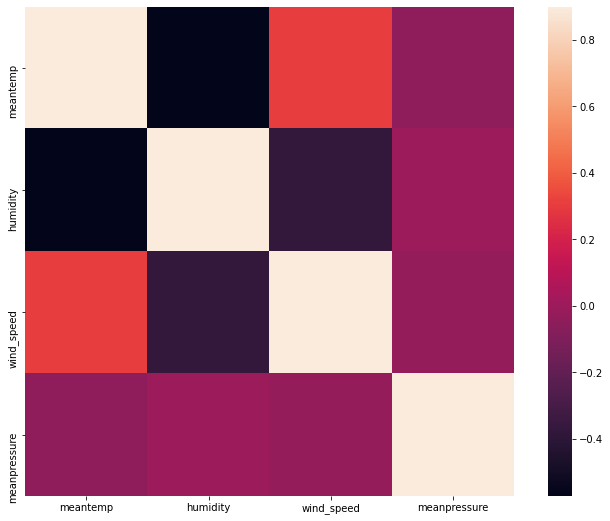

In [9]:
import seaborn as sns
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [10]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [11]:
dataset['Month'] = [i.month for i in dataset['date']]
dataset['Year'] = [i.year for i in dataset['date']]

In [12]:
dataset.drop(['date'], axis=1, inplace=True)

In [13]:
dataset.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year
0,10.000000,84.500000,0.000000,1015.666667,1,2013
1,7.400000,92.000000,2.980000,1017.800000,1,2013
2,7.166667,87.000000,4.633333,1018.666667,1,2013
3,8.666667,71.333333,1.233333,1017.166667,1,2013
4,6.000000,86.833333,3.700000,1016.500000,1,2013


In [14]:
!pip install pycaret

In [15]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [16]:
train = dataset[dataset['Year'] < 2016]
test = dataset[dataset['Year'] >= 2016]

In [17]:
train.shape

(1095, 6)

In [18]:
test.shape

(367, 6)

In [19]:
s = setup(data=train,test_data=test,target='meantemp',fold_strategy='timeseries',numeric_features=['Year','humidity','wind_speed','meanpressure'],categorical_features=['Month'],fold=3,transform_target=True,session_id=123)

,Description,Value
0,session_id,123
1,Target,meantemp
2,Original Data,"(1095, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1095, 16)"


In [20]:
models = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.7767,5.2736,2.2854,0.8939,0.1209,0.0893,0.4567
lightgbm,Light Gradient Boosting Machine,1.8558,5.8245,2.3943,0.8840,0.1240,0.0944,1.0133
ada,AdaBoost Regressor,1.9757,6.1715,2.4802,0.8713,0.1152,0.0922,0.1000
et,Extra Trees Regressor,2.1457,9.7608,2.8811,0.8171,0.1447,0.1141,0.3933
knn,K Neighbors Regressor,2.2351,8.7612,2.9592,0.8189,0.1491,0.1100,0.9000
dt,Decision Tree Regressor,2.3192,9.4958,3.0522,0.8107,0.1609,0.1127,0.0233
lasso,Lasso Regression,2.4106,8.7436,2.9541,0.8203,0.1482,0.1201,0.8433
omp,Orthogonal Matching Pursuit,2.7322,11.2565,3.3529,0.7626,0.1537,0.1263,0.0200
par,Passive Aggressive Regressor,5.8976,59.3226,7.5665,-0.1585,0.3467,0.3495,0.8300
llar,Lasso Least Angle Regression,6.7704,61.7069,7.8128,-0.2456,0.3446,0.3535,0.8333


In [21]:
#check the score on the test set
prediction_holdout = predict_model(models)  #best model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.068,7.818,2.7961,0.8371,0.12,0.0828


In [23]:
#generating predictions on the original dataset
predictions = predict_model(models, data=dataset)

In [24]:
#adding the 'date' column back to our original dataset
predictions['date'] = pd.date_range(start='2013-01-01', end = '2017-01-01', freq = 'D')

In [49]:
predictions

,meantemp,humidity,wind_speed,meanpressure,Month,Year,Label,date
0,10.000000,84.500000,0.000000,1015.666667,1,2013,12.795590,2013-01-01
1,7.400000,92.000000,2.980000,1017.800000,1,2013,11.468911,2013-01-02
2,7.166667,87.000000,4.633333,1018.666667,1,2013,11.548036,2013-01-03
3,8.666667,71.333333,1.233333,1017.166667,1,2013,12.922108,2013-01-04
4,6.000000,86.833333,3.700000,1016.500000,1,2013,11.443049,2013-01-05
...,...,...,...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,12,2016,16.918406,2016-12-28
1458,15.238095,87.857143,6.000000,1016.904762,12,2016,14.570416,2016-12-29
1459,14.095238,89.666667,6.266667,1017.904762,12,2016,13.588371,2016-12-30
1460,15.052632,87.000000,7.325000,1016.100000,12,2016,16.080758,2016-12-31


In [25]:
# line plot
import plotly.express as px

fig = px.line(predictions, x='date', y='meantemp',title='Comparison Plot for meantemp')
fig.add_scatter(x=predictions['date'], y=predictions['Label'])
fig.add_vrect(x0="2016-01-01", x1="2017-01-01")
fig.show()

 Now let’s finalize the model i.e. train the best model i.e. rfr on the entire dataset (this time, including the test set)

In [26]:
final_model = finalize_model(models)  #This function takes trained model object and returns a model that has been trained on the entire dataset. 

Tuning the model

In [27]:
final_model = tune_model(final_model,optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1675,7.2729,2.6968,0.8726,0.1444,0.1179
1,1.9543,6.1730,2.4846,0.8837,0.1301,0.1027
2,1.9287,5.3537,2.3138,0.8602,0.0917,0.0750
Mean,2.0168,6.2665,2.4984,0.8722,0.1221,0.0986
SD,0.1071,0.7863,0.1567,0.0096,0.0223,0.0177


 Create a future scoring dataset

In [28]:
testset=pd.read_csv('DailyDelhiClimateTest.csv')

In [29]:
testset.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [30]:
testset['date'] = pd.to_datetime(testset['date'])

In [31]:
testset['Month'] = [i.month for i in testset['date']]
testset['Year'] = [i.year for i in testset['date']]
testset.drop(['date'], axis=1, inplace=True)

In [32]:
testset.tail()

,meantemp,humidity,wind_speed,meanpressure,Month,Year
109,34.500,27.500000,5.562500,998.625000,4,2017
110,34.250,39.375000,6.962500,999.875000,4,2017
111,32.900,40.900000,8.890000,1001.600000,4,2017
112,32.875,27.500000,9.962500,1002.125000,4,2017
113,32.000,27.142857,12.157143,1004.142857,4,2017


In [33]:
predictions_future = predict_model(final_model, data=testset)
predictions_future.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year,Label
0,15.913043,85.869565,2.743478,59.000000,1,2017,23.575181
1,18.500000,77.222222,2.894444,1018.277778,1,2017,12.946323
2,17.111111,81.888889,4.016667,1018.333333,1,2017,12.955888
3,18.700000,70.050000,4.545000,1015.700000,1,2017,14.294829
4,18.388889,74.944444,3.300000,1014.333333,1,2017,14.675993


In [34]:
concat_df = pd.concat([dataset,predictions_future], axis=0)
concat_df

,meantemp,humidity,wind_speed,meanpressure,Month,Year,Label
0,10.000000,84.500000,0.000000,1015.666667,1,2013,NaN
1,7.400000,92.000000,2.980000,1017.800000,1,2013,NaN
2,7.166667,87.000000,4.633333,1018.666667,1,2013,NaN
3,8.666667,71.333333,1.233333,1017.166667,1,2013,NaN
4,6.000000,86.833333,3.700000,1016.500000,1,2013,NaN
...,...,...,...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000,4,2017,32.393444
110,34.250000,39.375000,6.962500,999.875000,4,2017,31.726595
111,32.900000,40.900000,8.890000,1001.600000,4,2017,31.590055
112,32.875000,27.500000,9.962500,1002.125000,4,2017,31.562868


In [35]:
concat_df_i = pd.date_range(start='2013-01-01', end = '2017-04-25', freq = 'D')
concat_df.set_index(concat_df_i, inplace=True)

In [36]:
fig = px.line(concat_df, x=concat_df.index, y=["meantemp", "Label"],title='Future Forecast of meantemp')
fig.show()

Prediction for Humidity

In [37]:
s_humidity = setup(data=train,test_data=test,target='humidity',fold_strategy='timeseries',numeric_features=['Year','meantemp','wind_speed','meanpressure'],categorical_features=['Month'],fold=3,transform_target=True,session_id=123)

,Description,Value
0,session_id,123
1,Target,humidity
2,Original Data,"(1095, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1095, 16)"


In [38]:
models_humidity = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,7.7307,98.4470,9.8640,0.5500,0.1730,0.1377,0.4667
gbr,Gradient Boosting Regressor,7.7632,100.7821,9.9952,0.5362,0.1757,0.1377,0.0867
et,Extra Trees Regressor,7.8924,102.0971,10.0339,0.5268,0.1802,0.1418,0.3900
lightgbm,Light Gradient Boosting Machine,8.0329,105.5623,10.2088,0.5158,0.1824,0.1455,0.2033
knn,K Neighbors Regressor,8.3449,112.9592,10.5950,0.4851,0.1877,0.1490,0.0900
ada,AdaBoost Regressor,8.5146,116.6605,10.7115,0.4250,0.1913,0.1589,0.0767
ridge,Ridge Regression,8.9760,124.1920,11.0770,0.3982,0.1943,0.1587,0.0233
huber,Huber Regressor,9.0730,129.7158,11.3110,0.3995,0.2115,0.1688,0.0500
br,Bayesian Ridge,9.1039,127.2445,11.2088,0.3860,0.1945,0.1605,0.0233
lr,Linear Regression,9.2456,130.9543,11.3728,0.3714,0.1966,0.1629,0.0200


In [39]:
#check the score on the test set
prediction_holdout = predict_model(models_humidity)  #best model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,8.3757,107.2752,10.3574,0.611,0.2078,0.1656


In [40]:
#generating predictions on the original dataset
predictions_humidity = predict_model(models_humidity, data=dataset)

In [41]:
#adding the 'date' column back to our original dataset
predictions_humidity['date'] = pd.date_range(start='2013-01-01', end = '2017-01-01', freq = 'D')

In [42]:
fig = px.line(predictions_humidity, x='date', y='humidity',title='Comparison Plot for humidity')
fig.add_scatter(x=predictions_humidity['date'], y=predictions_humidity['Label'])
fig.add_vrect(x0="2016-01-01", x1="2017-01-01")
fig.show()

In [43]:
final_model_humidity = finalize_model(models_humidity)

In [44]:
final_model_humidity = tune_model(final_model_humidity)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.8354,103.8843,10.1924,0.6935,0.1831,0.1422
1,7.8612,100.1111,10.0056,0.3153,0.1608,0.1341
2,7.2061,80.9825,8.9990,0.6757,0.1769,0.1433
Mean,7.6342,94.9926,9.7323,0.5615,0.1736,0.1399
SD,0.3029,10.0257,0.5241,0.1743,0.0094,0.0041


In [45]:
predictions_future_humidity = predict_model(final_model_humidity, data=testset)
predictions_future_humidity.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year,Label
0,15.913043,85.869565,2.743478,59.000000,1,2017,78.753486
1,18.500000,77.222222,2.894444,1018.277778,1,2017,72.725215
2,17.111111,81.888889,4.016667,1018.333333,1,2017,72.937355
3,18.700000,70.050000,4.545000,1015.700000,1,2017,70.576209
4,18.388889,74.944444,3.300000,1014.333333,1,2017,71.188088


In [46]:
concat_df = pd.concat([dataset,predictions_future_humidity], axis=0)
concat_df

,meantemp,humidity,wind_speed,meanpressure,Month,Year,Label
0,10.000000,84.500000,0.000000,1015.666667,1,2013,NaN
1,7.400000,92.000000,2.980000,1017.800000,1,2013,NaN
2,7.166667,87.000000,4.633333,1018.666667,1,2013,NaN
3,8.666667,71.333333,1.233333,1017.166667,1,2013,NaN
4,6.000000,86.833333,3.700000,1016.500000,1,2013,NaN
...,...,...,...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000,4,2017,42.454605
110,34.250000,39.375000,6.962500,999.875000,4,2017,41.606672
111,32.900000,40.900000,8.890000,1001.600000,4,2017,40.629515
112,32.875000,27.500000,9.962500,1002.125000,4,2017,40.449182


In [47]:
concat_df_i = pd.date_range(start='2013-01-01', end = '2017-04-25', freq = 'D')
concat_df.set_index(concat_df_i, inplace=True)

In [48]:
fig = px.line(concat_df, x=concat_df.index, y=["humidity", "Label"],title='Future Forecast of humidity')
fig.show()